# Task 1: Laying the Foundation for Analysis

In [1]:
# import necessary libraries
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

#### Loading data

In [3]:
# Loading the module
from src.DataLoader import DataLoader
import src.DataLoader
reload(src.DataLoader)

<module 'src.DataLoader' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/DataLoader.py'>

In [4]:
# data path
data_path ="../data/BrentOilPrices.csv"

In [5]:
# initialize the DataLoader
data_loader = DataLoader(data_path)
# load the data
oil_data = data_loader.load_data()

Data loaded successfully.


#### Preprocessing

In [6]:
# Load the model
from src.data_preprocessing import DataPreprocessing
import src.data_preprocessing
reload(src.data_preprocessing)

<module 'src.data_preprocessing' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_preprocessing.py'>

In [7]:
# initialize the data preprocessing
data_preprocessing = DataPreprocessing(oil_data)
# preprocess the data
oil_data_processed = data_preprocessing.preprocess()

Starting data preprocessing...
Date format changed and data sorted by date.
First few rows of the data after changing format:
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
Brent Oil Prices Time Series Head:


Date
1987-05-20    18.63
1987-05-21    18.45
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
Name: Price, dtype: float64


Brent Oil Prices Time Series Tail:


Date
2022-11-08    96.85
2022-11-09    93.05
2022-11-10    94.25
2022-11-11    96.37
2022-11-14    93.59
Name: Price, dtype: float64


Brent Oil Log Returns Time Series Head:


Date
1987-05-20         NaN
1987-05-21   -0.009709
1987-05-22    0.005405
1987-05-25    0.002692
1987-05-26    0.001612
Name: Log_Return, dtype: float64


Brent Oil Log Returns Time Series Tail:


Date
2022-11-08   -0.030706
2022-11-09   -0.040026
2022-11-10    0.012814
2022-11-11    0.022244
2022-11-14   -0.029271
Name: Log_Return, dtype: float64

Data preprocessing completed.


#### Exploratory Data Analysis (EDA)

In [8]:
# load the module
from src.EDA import EDA
import src.EDA
reload(src.EDA)

<module 'src.EDA' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/EDA.py'>

Running Exploratory Data Analysis...
Summary Statistics:
             Price   Log_Return
count  9011.000000  9010.000000
mean     48.420782     0.000179
std      32.860110     0.025532
min       9.100000    -0.643699
25%      19.050000    -0.011154
50%      38.570000     0.000402
75%      70.090000     0.012127
max     143.950000     0.412023

Data Types:
Price         float64
Log_Return    float64
dtype: object

Missing Values:
Price         0
Log_Return    1
dtype: int64


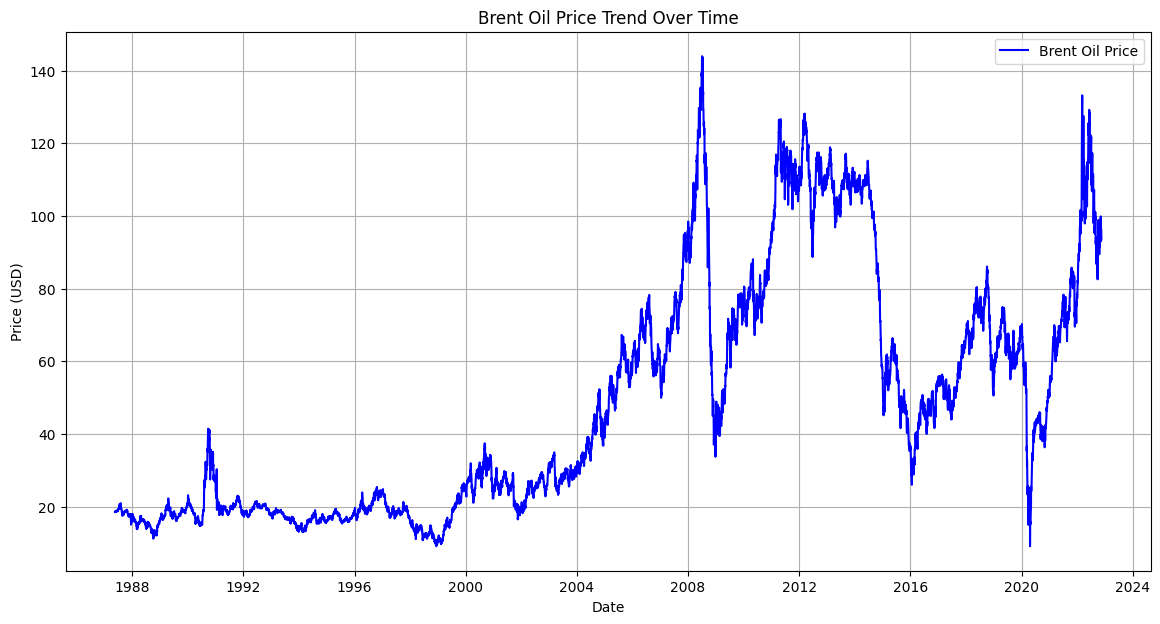

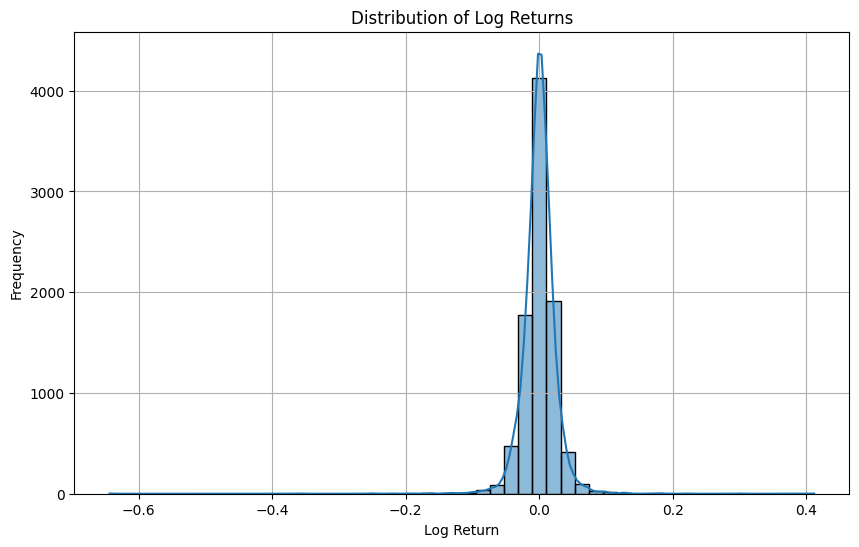

EDA completed.


,Price,Log_Return
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
...,...,...
2022-11-08,96.85,-0.030706
2022-11-09,93.05,-0.040026
2022-11-10,94.25,0.012814


In [9]:
# initialize the EDA
eda = EDA(oil_data_processed)
# perform EDA
eda.run_eda()

## Event Data Preparation

In [10]:
# Load the data
event_data_path = "../data/event.csv"
data_loader = DataLoader(event_data_path)
event_data = data_loader.load_data()


Data loaded successfully.


In [11]:
# event data display
display(event_data.head())

,Event,Start_Date,End_Date,Description,Reference
0,Gulf War (Iraq-Kuwait Crisis),1990-08-02,1991-02-28,Iraqi invasion of Kuwait caused supply fears; ...,EIA
1,Asian Financial Crisis,1997-07-02,1998-12-31,Reduced demand from Asia; prices fell to $10/b...,IMF
2,OPEC Production Cuts (2001),2001-01-17,2001-12-31,OPEC cut 1.5M bpd to stabilize prices post-9/1...,OPEC
3,Iraq War (2003),2003-03-20,2003-12-31,US invasion disrupted Iraqi exports; prices ro...,FRED
4,Global Financial Crisis (2008),2008-09-15,2009-06-30,Demand collapse; prices dropped from $147 to $...,World Bank


### visualize events

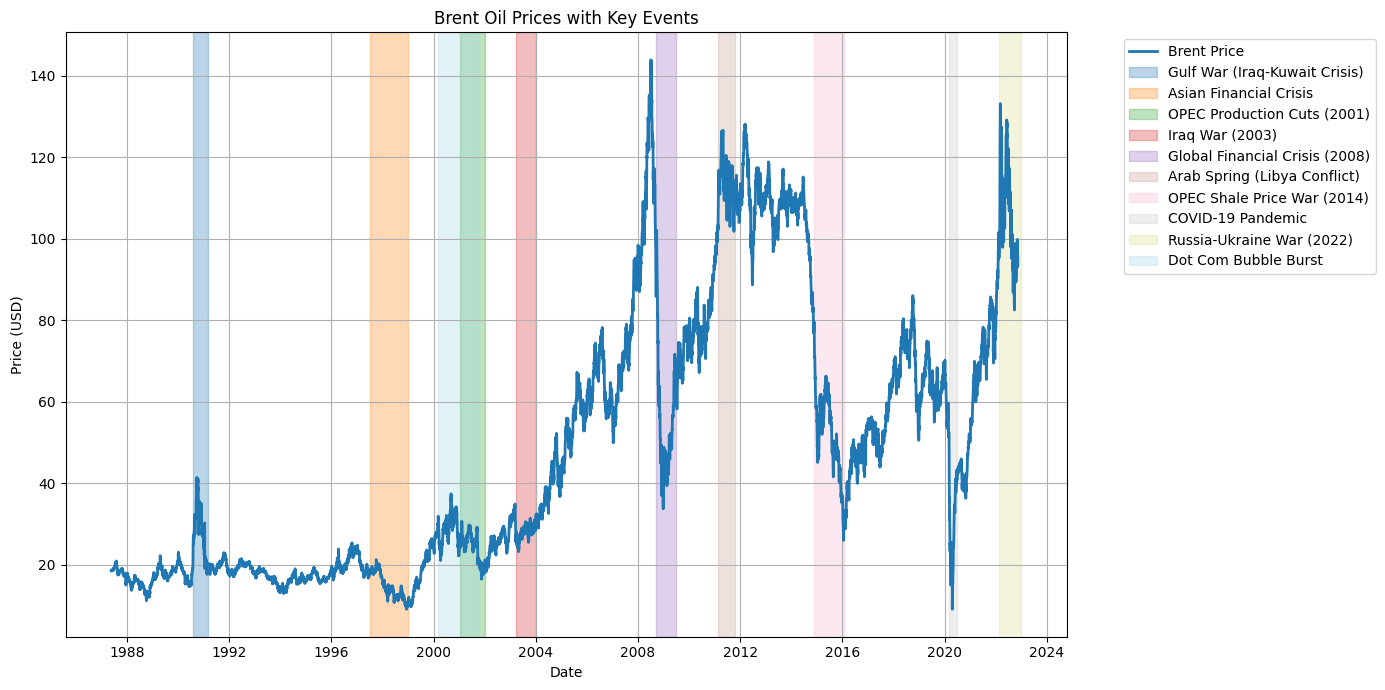

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(event_data)))

plt.figure(figsize=(14, 7))
plt.plot(oil_data['Date'], oil_data['Price'], label='Brent Price', linewidth=2)

# Plot each event with unique color
for i, (_, row) in enumerate(event_data.iterrows()):
    plt.axvspan(row['Start_Date'], row['End_Date'], 
                alpha=0.3, 
                color=colors[i],
                label=row['Event'])

plt.title('Brent Oil Prices with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()